## Importing necessary libraries.

In [1]:
!pip install pandas numpy seaborn
!pip install scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Loading the data.

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Data Understanding.

In [5]:
df.shape


(550068, 12)

In [6]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

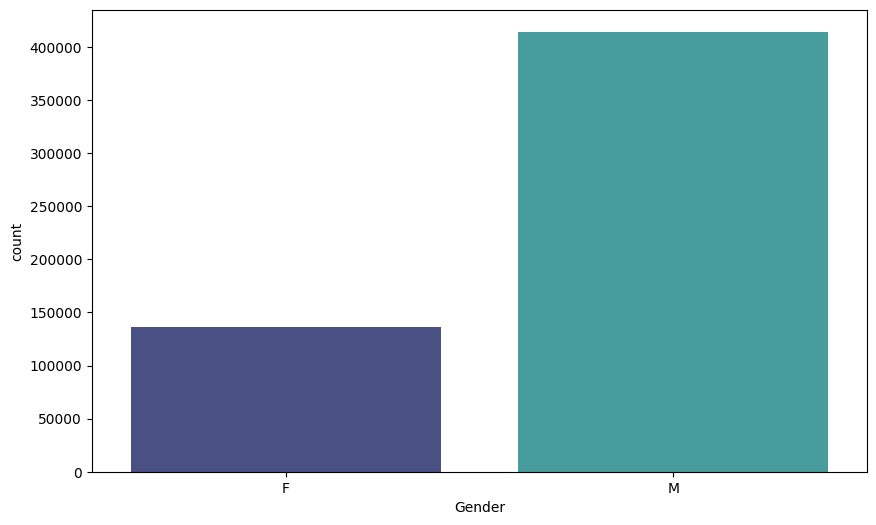

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='mako', hue='Gender', legend=False)


<Axes: xlabel='Gender', ylabel='Marital_Status'>

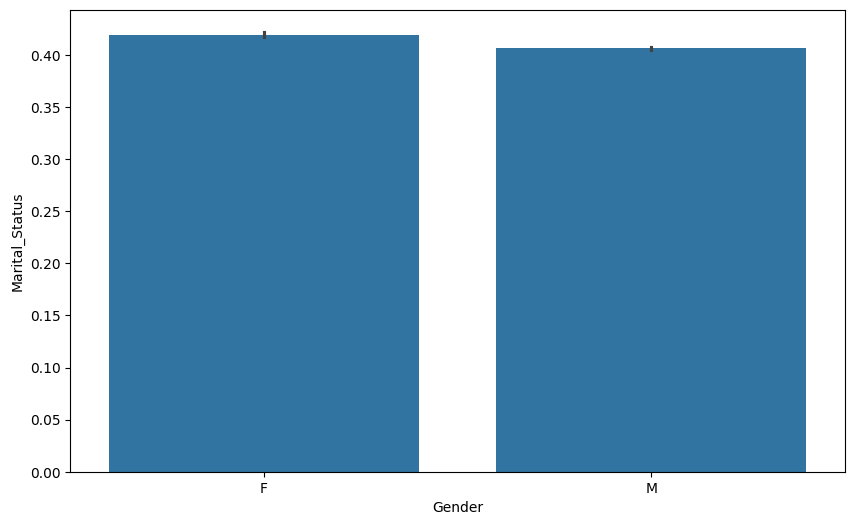

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Marital_Status',data=df)

<Axes: xlabel='Gender', ylabel='Purchase'>

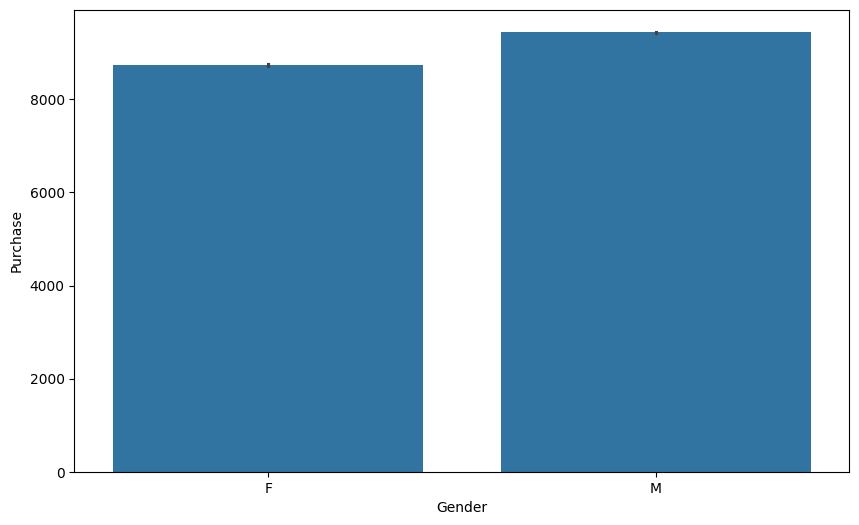

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Purchase',data=df)


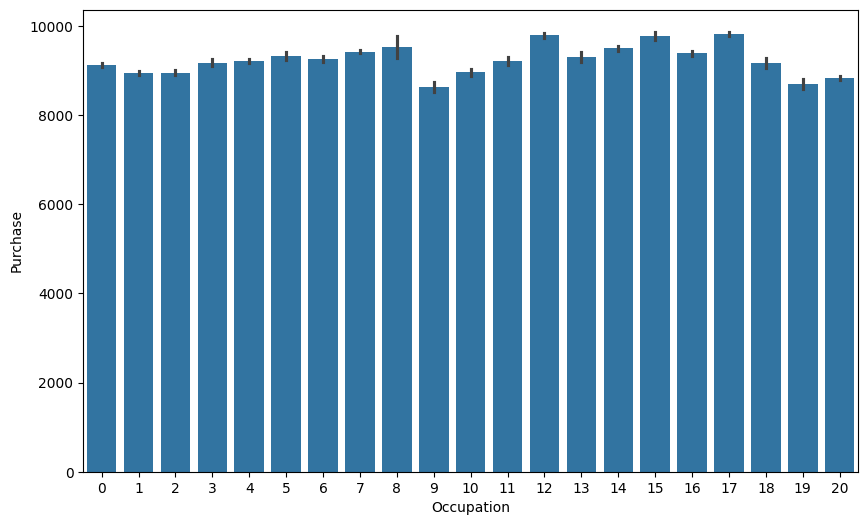

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',data=df);

<Axes: xlabel='Occupation', ylabel='Purchase'>

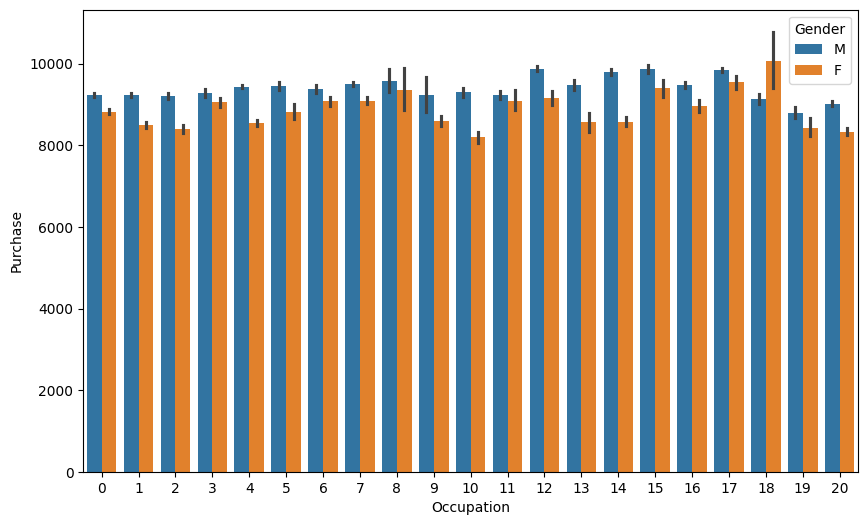

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)


# Outlier Detection.

## Checking the presence of outliers using BoxPlot.

<Axes: xlabel='Gender', ylabel='Purchase'>

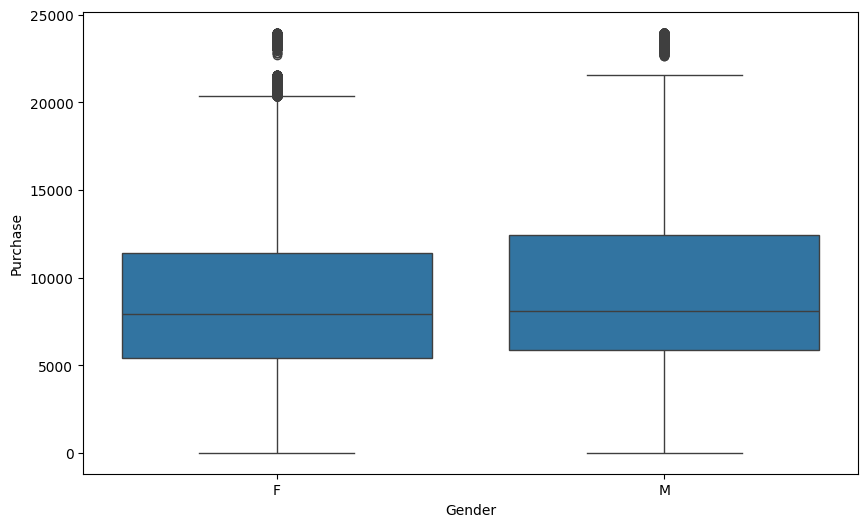

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Purchase")


<Axes: xlabel='Occupation', ylabel='Purchase'>

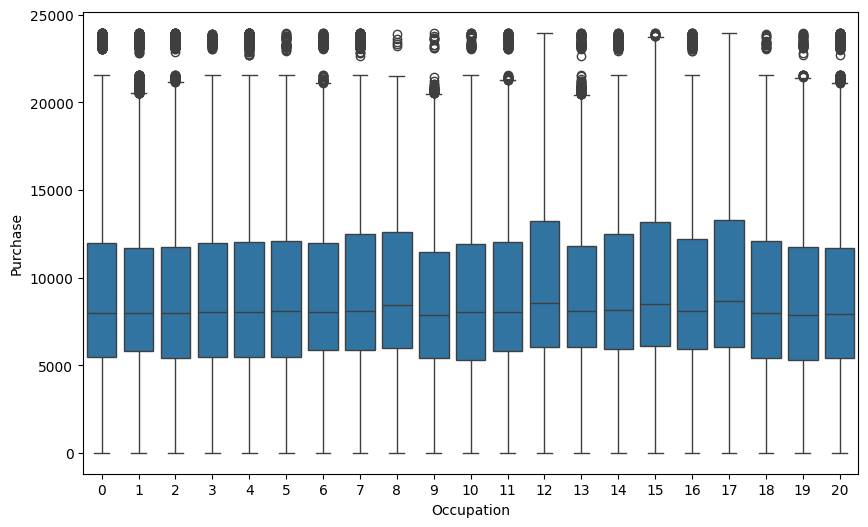

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Occupation", y="Purchase")

## As we can see above there are outliers present in the Purchase column.

<Axes: xlabel='Age', ylabel='Purchase'>

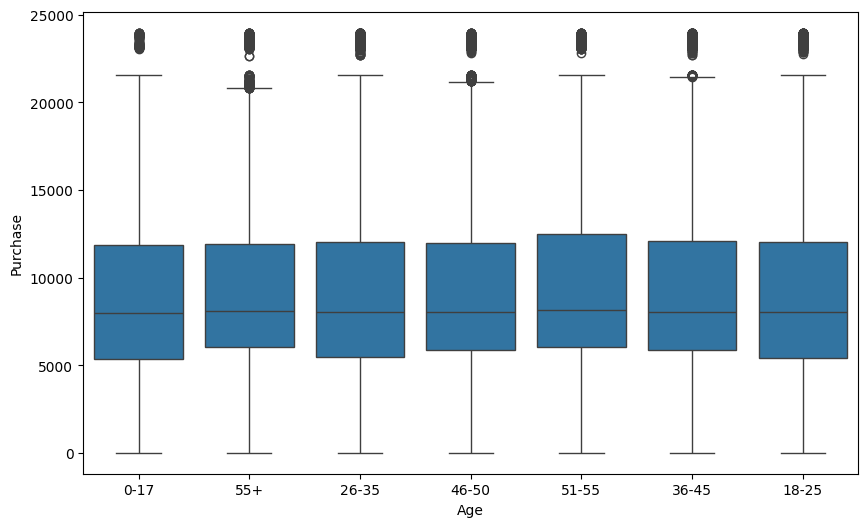

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age", y="Purchase")


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

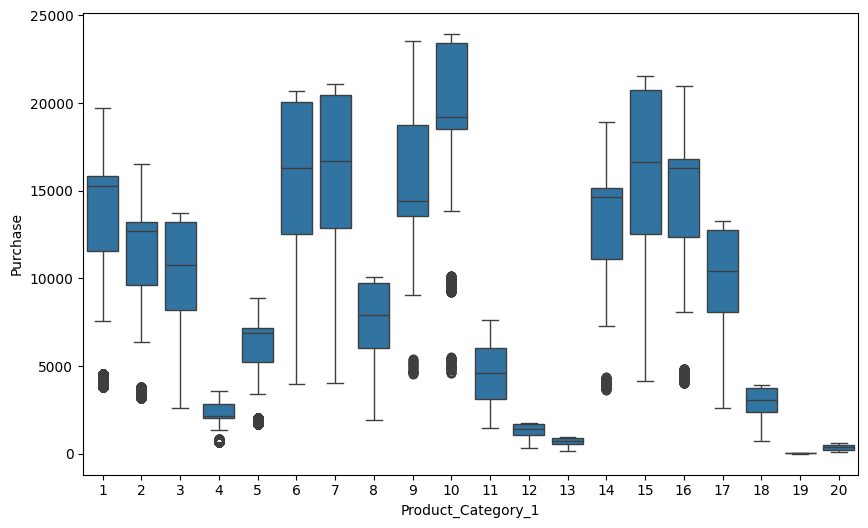

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Product_Category_1", y="Purchase")


## Data preprocessing

In [20]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [21]:
df['Product_ID'] = df['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))
 

In [22]:
df.drop(['Product_Category_3'],axis=1,inplace=True)


In [23]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())


In [24]:
df.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [25]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


## Label Encoding is a technique used to turn categorical variables to numeric values.

In [26]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes


User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [27]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')


In [28]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


In [29]:
df['City_Category']=df['City_Category'].astype('category')


In [30]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


# Distribution plot

### The distribution plot shows us how the overall data is distributed in the dataframe.

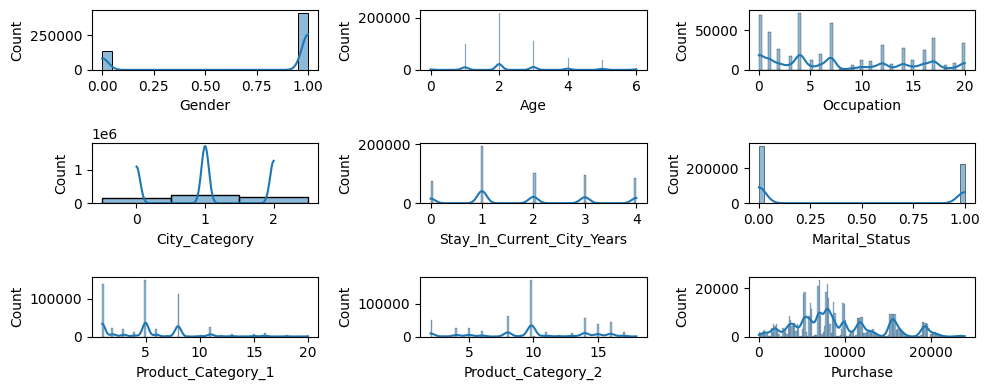

In [31]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.histplot(df[col[index]], ax=ax[i][j], kde=True)
        index=index+1
        
plt.tight_layout()


# Log transformation

In [32]:
df['Purchase']=np.log(df['Purchase'])


In [33]:
df= pd.get_dummies(df)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True


# Train test split.

In [34]:
X=df.drop(labels=['Purchase'],axis=1)                         
Y=df['Purchase']
X.head()


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,False,False,True


In [35]:
# Target column.
Y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

## 80 percent data is used for training purpose and 20 percent is used for testing.

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(440054, 12) (110014, 12) (440054,) (110014,)


## Scaling the data

In [37]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)


# Machine Learning.

## Linear Regression

In [38]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
Y_predict=model.predict(X_test)


In [40]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.20164239866768308
mean_absolute_error:  0.4556581711291083
mean_squared_error:  0.44379631112917706
root_mean_squared_error:  0.6661803893309807


## Decision Tree Regressor

In [41]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9)

In [42]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [43]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.3680408214406253
RMSE TestData =  0.36892084144230125
--------------------------------------------------
RSquared value on train: 0.7519510621944241
RSquared value on test: 0.7551612476995094


## Random Forest Regressor

In [44]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [45]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [46]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.13151739247633243
RMSE TestData =  0.35003765559152816
--------------------------------------------------
RSquared value on train: 0.9683253541004034
RSquared value on test: 0.7795839021605284


In [47]:
df_test=pd.read_csv('test.csv')


In [48]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [49]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

## The null values in the test data have to be treated as well.

In [50]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_test['Product_ID'] = ss.fit_transform(df_test['Product_ID'].values.reshape(-1, 1))


In [51]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)


In [52]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())


In [53]:
df_test.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [54]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


## Label Encoding categorical data

In [55]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes


User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

## Categorical data in the test dataframe are converted to numeric values using label encoding.

In [56]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')


In [57]:
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')


In [58]:
df_test= pd.get_dummies(df_test)


In [59]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.0,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.0,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.0,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.0,False,False,True


### Shape of the train data.

In [60]:
df.shape
# train data shape

(550068, 13)

### Shape of the test data.

In [61]:
df_test.shape
# test data shape

(233599, 12)

In [62]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,20,9.842329,5.908083,False,True,False
550064,1006035,1.953267,0,2,1,3,0,20,9.842329,5.916202,False,False,True
550065,1006036,1.953267,0,2,15,4,1,20,9.842329,4.919981,False,True,False
550066,1006038,1.953267,0,6,1,2,0,20,9.842329,5.899897,False,False,True


In [63]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.000000,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.000000,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.000000,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.000000,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,0,2,15,4,1,8,9.849586,False,True,False
233595,1006036,0.801456,0,2,15,4,1,5,8.000000,False,True,False
233596,1006036,-1.389691,0,2,15,4,1,1,5.000000,False,True,False
233597,1006037,-0.476058,0,4,1,4,0,10,16.000000,False,False,True


In [64]:
test_preds= RF.predict(df_test)
len(test_preds)

C:\Users\anita\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


233599

In [66]:
ID_info= id_frame[["User_ID","Product_ID"]]
ID_info.head()


,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [67]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.head()


,Purchase,User_ID,Product_ID
0,9.605112,1000004,P00128942
1,9.507837,1000009,P00113442
2,4.603234,1000010,P00288442
3,4.603234,1000010,P00145342
4,4.599669,1000011,P00053842


In [68]:
predictions.to_csv('BlackFridayPredictions.csv', index=False)
